# Import and load the necessary Python modules for data analysis and machine learning

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

The UCI Heart Disease dataset with **14 columns** and over **300 samples** is used. The dataset is sourced from https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci.

# Loading and Inspection of the dataset.

In [2]:
heart = pd.read_csv('heart.csv')
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values.

# Exploratory Data Analysis

In [5]:
for column in heart.columns:
  print(f'{column}:', heart[column].unique())
# categorical values: sex, cp, fbs, restecg, exang, slope, ca, thal
# values to be normalized: age, trestbps, chol, thalach, oldpeak

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
cp: [3 2 1 0]
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs: [1 0]

From the unique target column values, this is a **Classification** problem with classes 0 and 1 representing absence and presence of heart disease in a patient, respectively.

In [6]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Categorical columns
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Numeric columns

1    165
0    138
Name: target, dtype: int64


<Axes: xlabel='target', ylabel='count'>

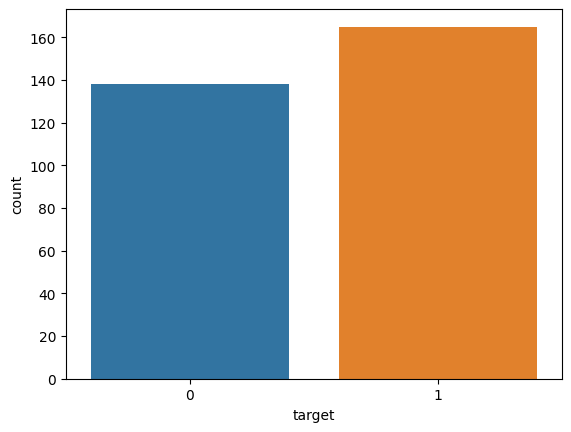

In [7]:
print(heart['target'].value_counts())
sns.countplot(data=heart, x='target')

**Analysing the categorical values**

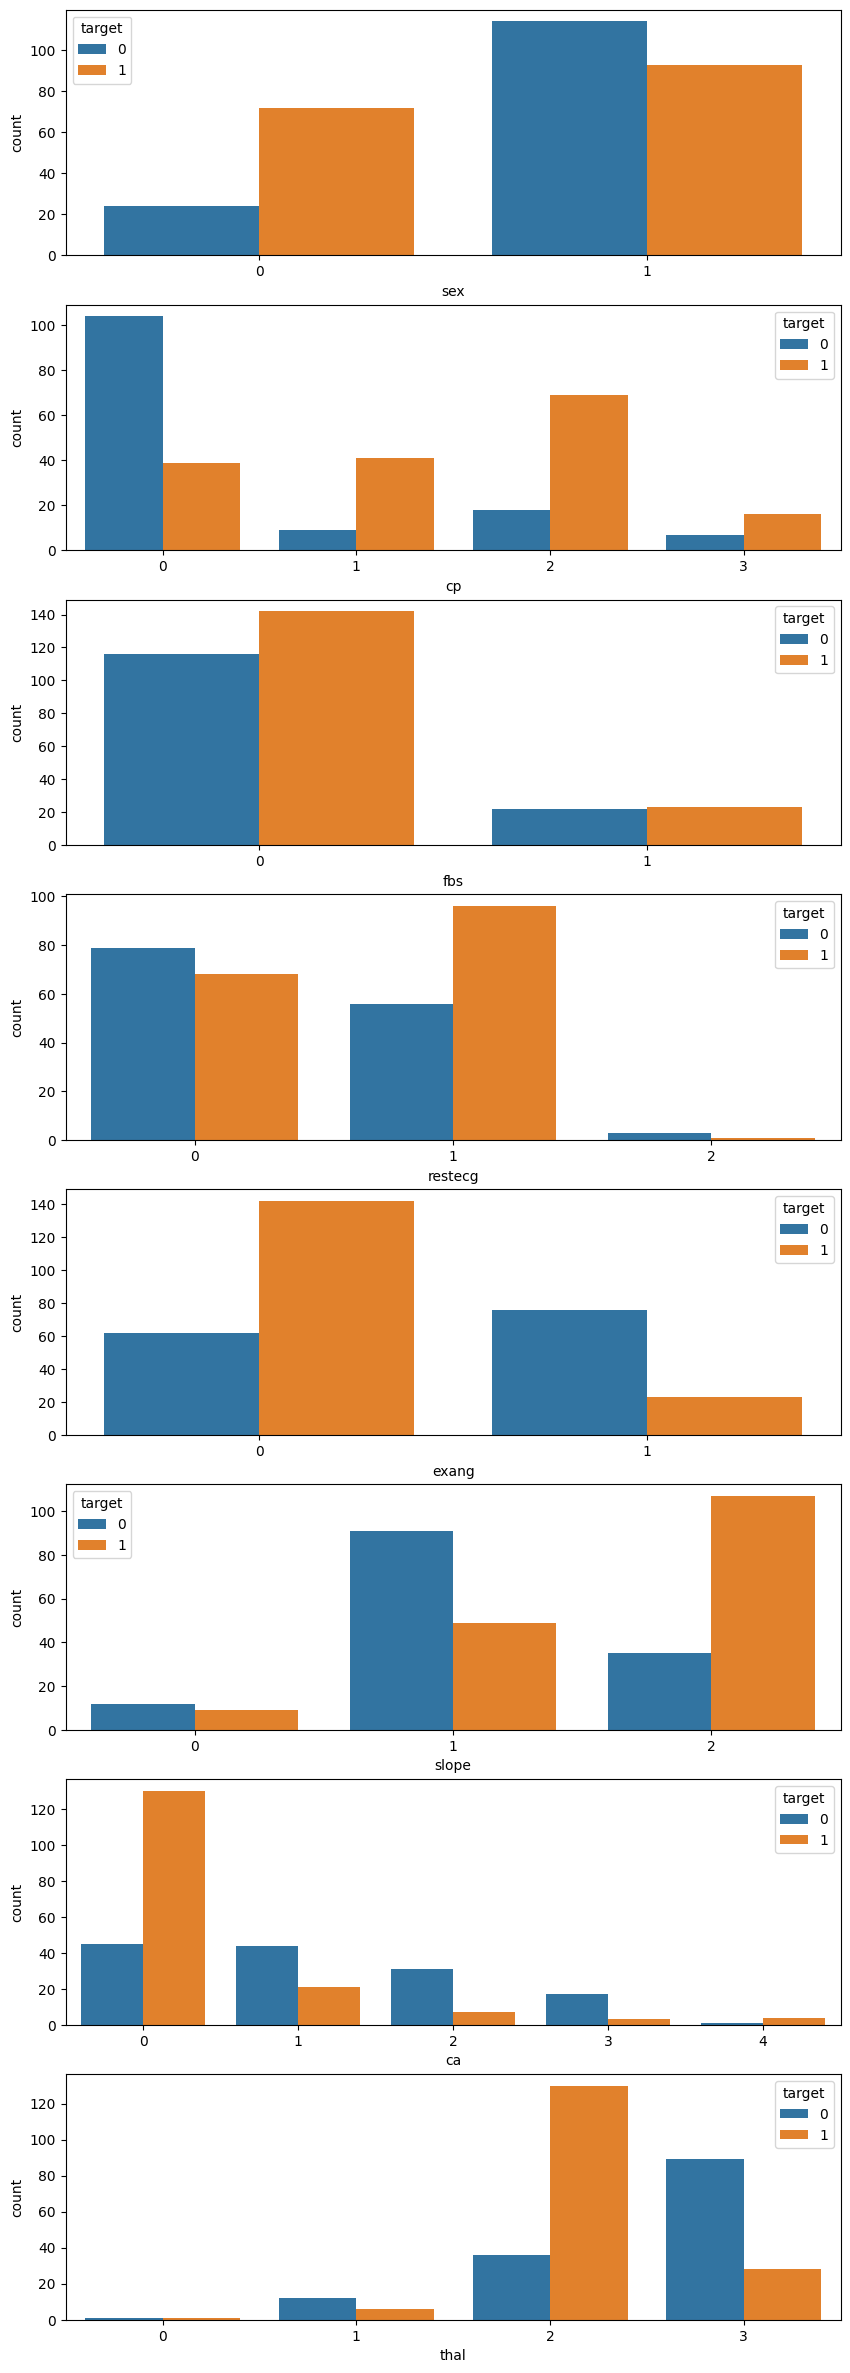

In [8]:
fig, axes = plt.subplots(nrows=len(categorical), figsize=(10, 30))

for i, col in enumerate(categorical):
  sns.countplot(data=heart, x=col, hue='target', ax=axes[i])
  plt.xlabel(col)

From these plots (where the target in blue represents the absence of heart disease), we can gather that:
*   females(represented by 0) are less likely to have a heart disease.
*   patients with a chest pain (cp) value of 0 are less likely to have a heart disease.
*   patients with fbs value of 1 are less likely to have a heart disease.
*   patients with restecg value of 2 are much less likely to have a heart disease
*   patients with exang value of 0 are much more likely to have a heart disease than others with exang value of 1
*   the slope value of 2 represents patients most likely to have a heart disease.
*   patients with a ca value of 0 are much more likely to have a heart disease.
*   patients with a thal value of 2 are more likely to have a heart disease.


**Inspecting the numeric values**

<Figure size 300x300 with 0 Axes>

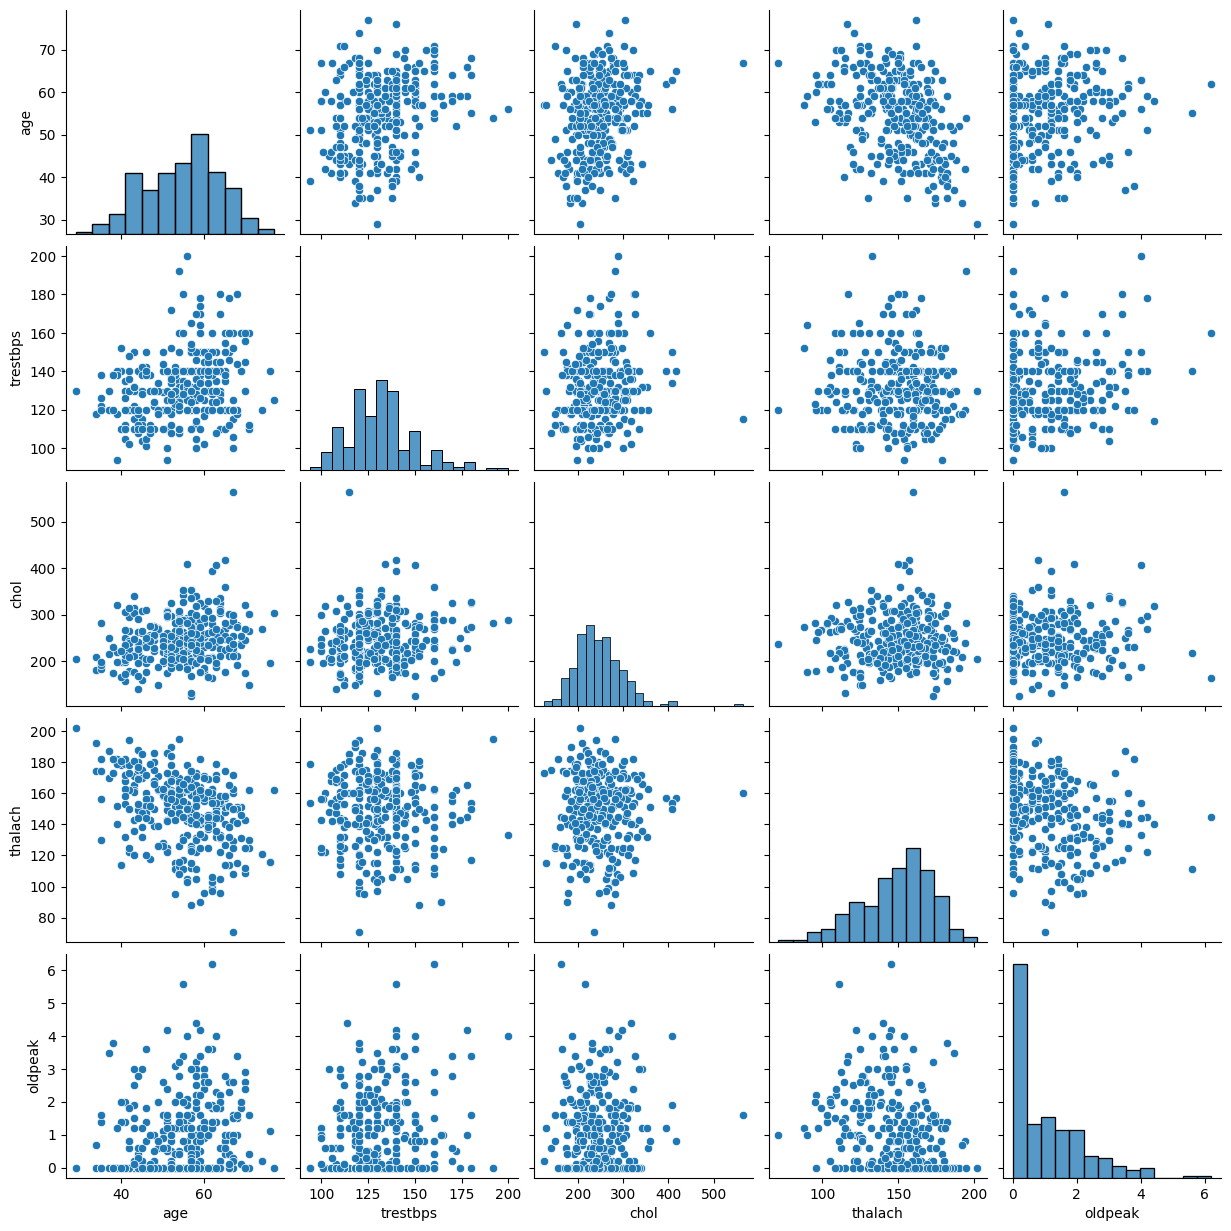

In [9]:
plt.figure(figsize=(3, 3))
sns.pairplot(data=heart[numeric])

Most patients are around the age of 60.

**Inspecting the correlation between variables**

In [10]:
heart.corr()['target'].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

This shows that there is moderate correlation between most columns and the target variable with fbs having the least correlation.

<Axes: >

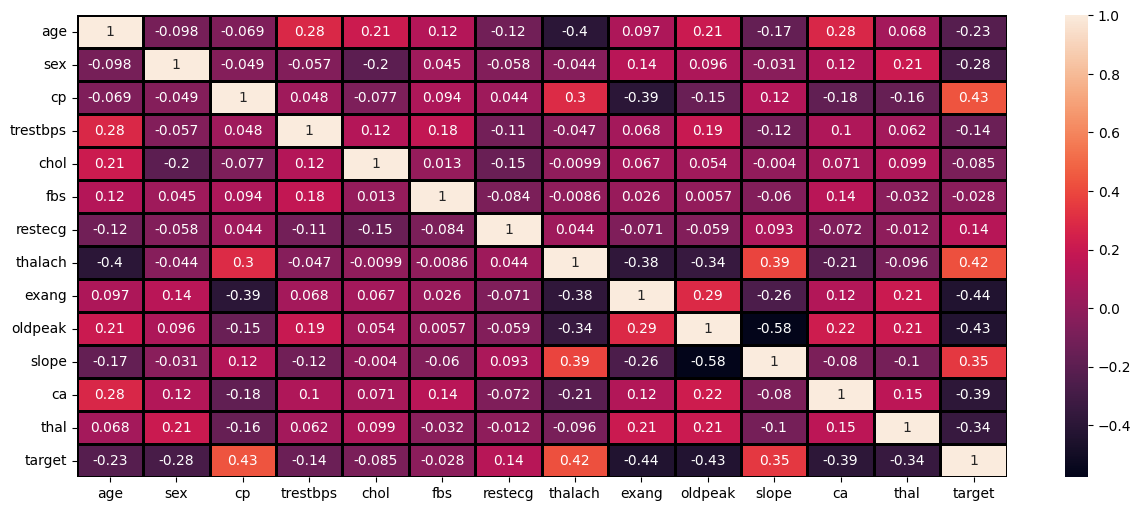

In [11]:
plt.figure(figsize=(15, 6))
sns.heatmap(heart.corr(), annot=True, linecolor='Black', linewidths=1.0)

Before the data is ready to be passed into the models, we split our data into the training and test sets with a 70-30 ratio to avoid data leakage.

# Splitting the data

In [12]:
# Split the data
X = heart.drop(['target'], axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1)

# Model Development

Instantiating and fitting the **KNeighbors Classifier** with the data because it is very efficient in classification problems with small datasets:

In [13]:
knn_scores = {}
max_accuracy = 0
for n in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  current_accuracy = accuracy_score(y_test, knn_pred)
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_n = n

knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('KNeighborsClassifier Model metrics')
print('Best number of neighbors:', best_n, '\nAccuracy:', max_accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, knn_pred))

KNeighborsClassifier Model metrics
Best number of neighbors: 35 
Accuracy: 0.7362637362637363
Confusion matrix:
 [[26 15]
 [ 9 41]]


Using the **Logistic Regression** Model because it is a simple and easy algorithm perfect for Classification problems:

In [21]:
# Logistic Regression Model
max_accuracy = 0
for i in range(4000, 5000):
  reg = LogisticRegression(max_iter=i, penalty='l1', solver='saga')
  reg.fit(X_train, y_train)
  reg_pred = reg.predict(X_test)
  current_accuracy = accuracy_score(y_test, reg_pred)
  if current_accuracy>max_accuracy:
    max_accuracy = current_accuracy
    best_i = i

reg = LogisticRegression(max_iter=best_i, penalty='l1', solver='saga')
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print('Logistic Regression Model metrics')
print('Accuracy:', max_accuracy)
print('Best max_iter:', i)
print('Confusion matrix:\n', confusion_matrix(y_test, reg_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Logistic Regression Model metrics
Accuracy: 0.8241758241758241
Best max_iter: 4999
Confusion matrix:
 [[32  9]
 [ 8 42]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Using the **Random Forest Classifier** because it works well with categorical data and helps to improve accuracy:

In [22]:
rfc_scores = {}
max_accuracy = 0
for r in range(2000):
  rfc = RandomForestClassifier(random_state=r)
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  current_accuracy = accuracy_score(y_test, rfc_pred)
  if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_r = r

rfc = RandomForestClassifier(random_state=best_r)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Random Forest Classifier Model metrics')
print('Accuracy:', accuracy_score(y_test, rfc_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, rfc_pred))
print('Best r:', best_r)

Random Forest Classifier Model metrics
Accuracy: 0.8791208791208791
Confusion matrix:
 [[34  7]
 [ 4 46]]
Best r: 941


Tuning the hyperparameters of the Random Forest Classifier using **RandomizedSearchCV**:

In [23]:
rfc2 = RandomForestClassifier()
rfc_param_grid = {'n_estimators':range(1, 1000, 10)}
rfc_random = RandomizedSearchCV(param_distributions=rfc_param_grid,
                                estimator=rfc2,
                                scoring='accuracy',
                                verbose=0,
                                n_iter=100,
                                cv=4)
rfc_random.fit(X_train, y_train)
print('Best model:', rfc_random.best_estimator_,
      'Best parameter:', rfc_random.best_params_,
      'Best score:', rfc_random.best_score_)
rfc_random_pred = rfc_random.predict(X_test)
print('Accuracy:', accuracy_score(y_test, rfc_random_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, rfc_random_pred))

Best model: RandomForestClassifier(n_estimators=171) Best parameter: {'n_estimators': 171} Best score: 0.8349056603773586
Accuracy: 0.8681318681318682
Confusion matrix:
 [[35  6]
 [ 6 44]]


The Random Forest Classifier has the highest accuracy (**87.9%**) and the lowest False Negative count (**4**) which is important in disease prediction systems. It is therefore, the best performing model used without feature engineering.

# Feature Engineering

Some columns contain categorical variables, we **one-hot encode** some columns using the **Pandas** library and **normalize** the other columns using the **Standard scaler** from the sk learn library to avoid unintentional bias.

In [24]:
# Normalize the data to avoid unintentional bias due to the high variance in the values of cols_b
scaler = StandardScaler()
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric]), columns=numeric)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric]), columns=numeric)

In [25]:
# One-Hot Encode categorical values
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Training and Test sets are combined, One-Hot Encoded then split to ensure all categories are considered during One-Hot Encoding
# and to give the same number of columns in the training and test sets.
X_combined = pd.concat([X_train, X_test], axis=1)
X_combined_encoded = pd.get_dummies(X_combined.drop(numeric, axis=1), columns=categorical)

X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

X_train_encoded.shape, X_test_encoded.shape

((212, 49), (91, 49))

In [26]:
# Concatenate the scaled and encoded versions of X
X_train = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Model Development

**KNeighbors Classifier**

In [27]:
knn_scores = {}
max_accuracy = 0
for n in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  current_accuracy = accuracy_score(y_test, knn_pred)
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_n = n

#max_key = max(knn_scores, key=knn_scores.get)
knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('KNeighborsClassifier Model metrics')
print('Best number of neighbors:', best_n, '\nAccuracy:', max_accuracy)
print('Confusion matrix:\n', confusion_matrix(y_test, knn_pred))

KNeighborsClassifier Model metrics
Best number of neighbors: 53 
Accuracy: 0.7912087912087912
Confusion matrix:
 [[27 14]
 [ 5 45]]


This KNN model shows a higher accuracy and a lower False Negative score than the first KNN model.

**Logistic Regression Model**

In [30]:

max_accuracy = 0
for i in range(4000, 5001):
  reg = LogisticRegression(max_iter=i)
  reg.fit(X_train, y_train)
  reg_pred = reg.predict(X_test)
  current_accuracy = accuracy_score(y_test, reg_pred)
  if current_accuracy>max_accuracy:
    max_accuracy = current_accuracy
    best_i = i

reg = LogisticRegression(max_iter=best_i)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print('Logistic Regression Model metrics')
print('Accuracy:', max_accuracy)
print('Best max_iter:', i)
print('Confusion matrix:\n', confusion_matrix(y_test, reg_pred))

Logistic Regression Model metrics
Accuracy: 0.7692307692307693
Best max_iter: 5000
Confusion matrix:
 [[28 13]
 [ 8 42]]


RandomForestClassifier

In [29]:
rfc_scores = {}
max_accuracy = 0
for r in range(2000):
  rfc = RandomForestClassifier(random_state=r)
  rfc.fit(X_train, y_train)
  rfc_pred = rfc.predict(X_test)
  current_accuracy = accuracy_score(y_test, rfc_pred)
  if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_r = r

rfc = RandomForestClassifier(random_state=best_r)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Random Forest Classifier Model metrics')
print('Accuracy:', accuracy_score(y_test, rfc_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, rfc_pred))

Random Forest Classifier Model metrics
Accuracy: 0.8131868131868132
Confusion matrix:
 [[28 13]
 [ 4 46]]


**RandomizedSearchCV**

In [31]:
rfc2 = RandomForestClassifier()
rfc_param_grid = {'n_estimators':range(1, 1000, 10)}
rfc_random = RandomizedSearchCV(param_distributions=rfc_param_grid,
                                estimator=rfc2,
                                scoring='accuracy',
                                verbose=0,
                                n_iter=100,
                                cv=4)
rfc_random.fit(X_train, y_train)
print('Best model:', rfc_random.best_estimator_,
      'Best parameter:', rfc_random.best_params_,
      'Best score:', rfc_random.best_score_)
rfc_random_pred = rfc_random.predict(X_test)
print('Accuracy:', accuracy_score(y_test, rfc_random_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, rfc_random_pred))

Best model: RandomForestClassifier(n_estimators=441) Best parameter: {'n_estimators': 441} Best score: 0.8254716981132076
Accuracy: 0.6703296703296703
Confusion matrix:
 [[33  8]
 [22 28]]


The Random Forest Classifier gives the highest accuracy and the lowest False Negative count which is important in disease prediction systems. Hence, it is the best performing model used.